In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import pylab
pylab.rcParams['figure.figsize'] = (12, 8)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [34]:
data=pd.read_csv('../LiquidityMomentum/liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


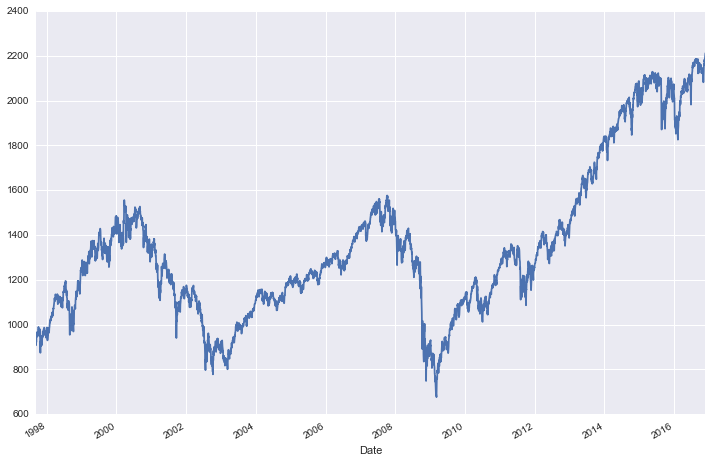

In [35]:
data.ES.dropna().plot()

# Calculate Zscores on single markets and understand distribution
Using just S&P futures.  I'm trying to undrstand the trade offs between look backs on the distributions.  But the basic formula is easy:

$$ Z = \frac{px - \mu_{ew20day}}{\sigma_{ew20day}} $$

In [86]:
df=pd.DataFrame()
df['price']=data.ES.dropna()
df['Avg']=pd.ewma(df.price,20)
df['STD']=pd.ewmstd(df.price,20)
df['zscore']=(df.price-df.Avg)/df.STD

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).mean()
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,min_periods=0,adjust=True,com=20).std(bias=False)


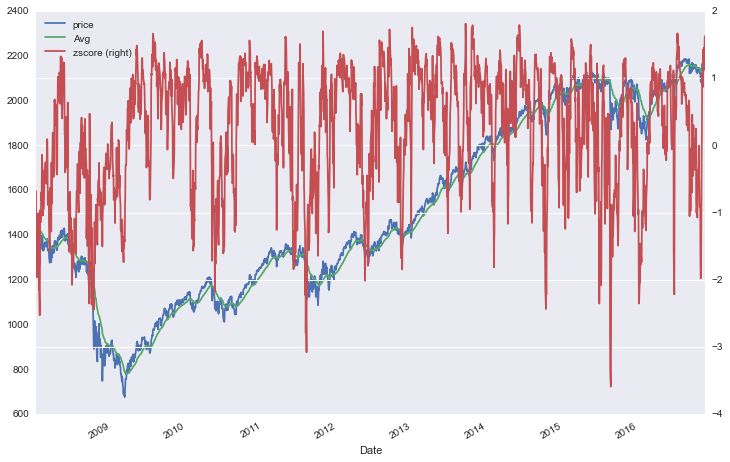

In [87]:
df[['price','Avg','zscore']]['2008':].plot(secondary_y='zscore')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


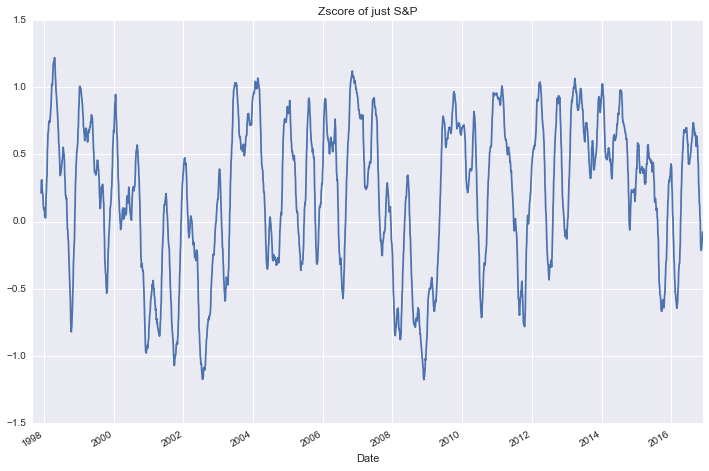

In [90]:
pd.rolling_mean(df.zscore,60).plot(title='Zscore of just S&P')

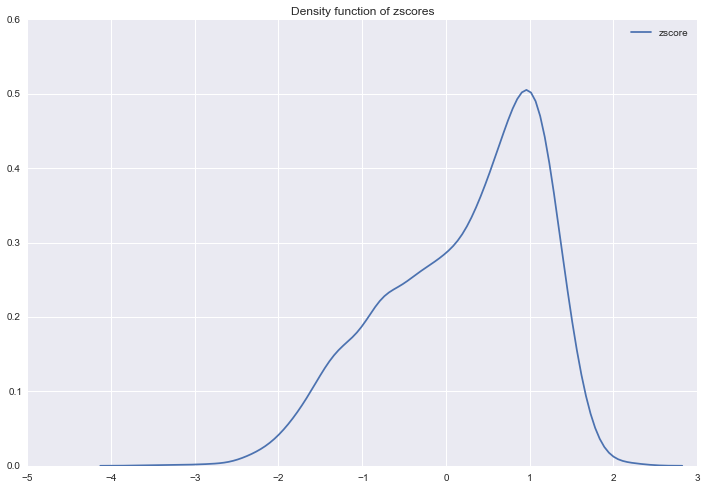

In [48]:
ax=sns.kdeplot(df.zscore,)
ax.set_title('Density function of zscores')

# Across the universe of markets
The goal is to calculate on all available markets to determine which markets are moving.  Once we have that then the presentation layer should be to send a daily email.

In [58]:
zscores=(data-pd.ewma(data,20))/pd.ewmstd(data,20)
x=zscores.tail(1)

In [72]:
x.T.sort()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


Date,2016-11-25 00:00:00
AP14 Richards Bay,0.270407
API 8 South China Coal,0.150388
API2 Coal,0.487379
Amsterdam Exchange,1.338895
BEL 20,-0.082029
BRL/USD,-0.843931
Brent Crude,-0.319234
Butter,-0.024677
CAC 40,0.919021
CAD/USD,-0.912139


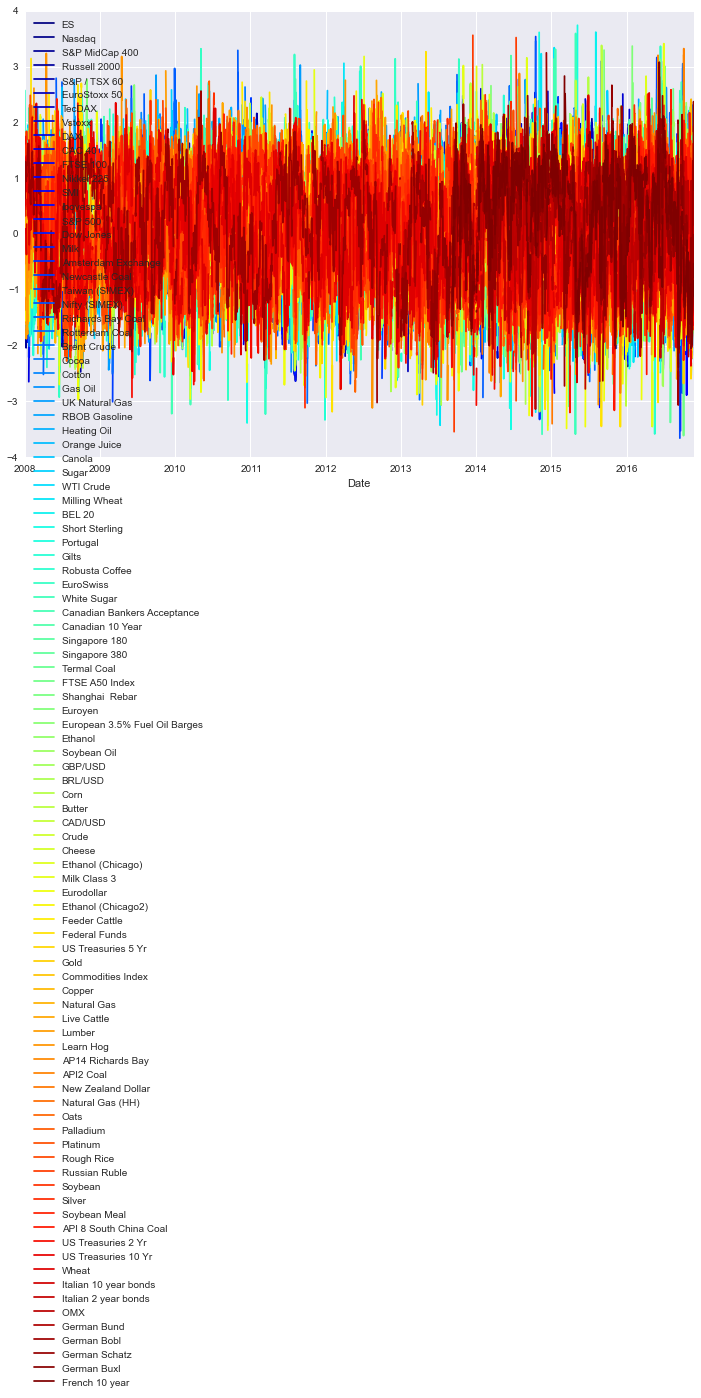

In [76]:
zscores['2008':].plot(colormap='jet')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


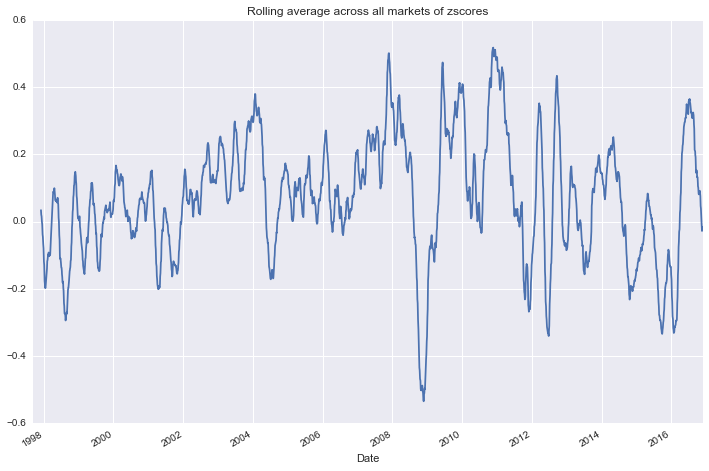

In [85]:
pd.rolling_mean(zscores.mean(axis=1).dropna(),60).plot(title='Rolling average across all markets of zscores')